In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime
import seaborn as sns
import ast
import networkx as nx
import datetime
from wordcloud import WordCloud, STOPWORDS

In [61]:
data = pd.read_csv("C:\\Users\\ASUS\\Desktop\\Data Mining Project\\ted-talks\\ted_main.csv")
pd.set_option('precision', 3)
data['film_date'] = data['film_date'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))
data['published_date'] = data['published_date'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
sns.set_style("whitegrid")
sns.set(font_scale = 1.2)

## Most Viewed and Commented Talks

In [62]:
data[['comments', 'duration', 'views']].describe()

,comments,duration,views
count,2550.000,2550.000,2.550e+03
mean,191.562,826.510,1.698e+06
std,282.315,374.009,2.498e+06
min,2.000,135.000,5.044e+04
25%,63.000,577.000,7.558e+05
50%,118.000,848.000,1.125e+06
75%,221.750,1046.750,1.701e+06
max,6404.000,5256.000,4.723e+07


In [63]:
data[['title', 'main_speaker', 'views', 'published_date']].sort_values(ascending = False, by = 'views').head(15)

,title,main_speaker,views,published_date
0,Do schools kill creativity?,Ken Robinson,47227110,26-06-2006
1346,Your body language may shape who you are,Amy Cuddy,43155405,01-10-2012
677,How great leaders inspire action,Simon Sinek,34309432,04-05-2010
837,The power of vulnerability,Brené Brown,31168150,23-12-2010
452,10 things you didn't know about orgasm,Mary Roach,22270883,19-05-2009
1776,How to speak so that people want to listen,Julian Treasure,21594632,27-06-2014
201,My stroke of insight,Jill Bolte Taylor,21190883,11-03-2008
5,Why we do what we do,Tony Robbins,20685401,27-06-2006
2114,This is what happens when you reply to spam email,James Veitch,20475972,08-01-2016
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,16-01-2013


In [64]:
data[['title', 'main_speaker', 'comments', 'published_date']].sort_values(ascending = False, by = 'comments').head(15)

,title,main_speaker,comments,published_date
96,Militant atheism,Richard Dawkins,6404,15-04-2007
0,Do schools kill creativity?,Ken Robinson,4553,26-06-2006
644,Science can answer moral questions,Sam Harris,3356,22-03-2010
201,My stroke of insight,Jill Bolte Taylor,2877,11-03-2008
1787,How do you explain consciousness?,David Chalmers,2673,14-07-2014
954,Taking imagination seriously,Janet Echelman,2492,07-06-2011
840,On reading the Koran,Lesley Hazleton,2374,04-01-2011
1346,Your body language may shape who you are,Amy Cuddy,2290,01-10-2012
661,The danger of science denial,Michael Specter,2272,12-04-2010
677,How great leaders inspire action,Simon Sinek,1930,04-05-2010


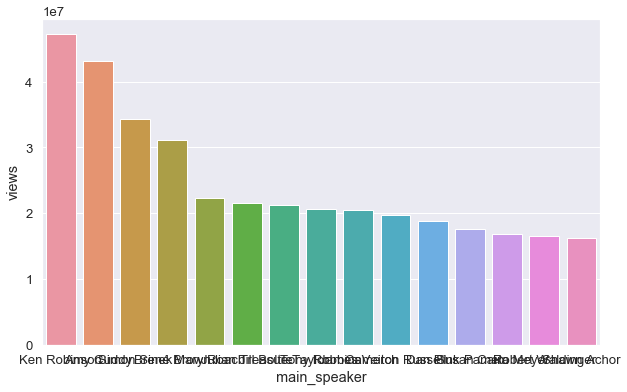

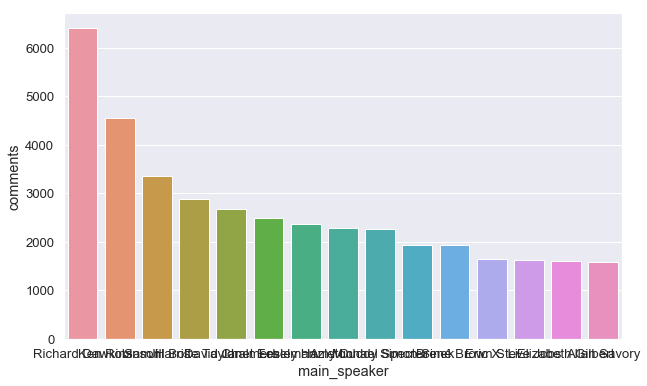

In [65]:
temp = data[['main_speaker', 'views']].sort_values(ascending = False, by = 'views').head(15)
plt.figure(figsize = (10, 6))
sns.barplot(x = 'main_speaker', y = 'views', data = temp)

temp = data[['main_speaker', 'comments']].sort_values(ascending = False, by = 'comments').head(15)
plt.figure(figsize = (10, 6))
sns.barplot(x = 'main_speaker', y = 'comments', data = temp)

In [66]:
data['views/comments'] = data['views'] / data['comments']
temp = data[['title', 'main_speaker','views', 'comments', 'views/comments']].sort_values('views/comments', ascending = True)
temp.head(10)

,title,main_speaker,views,comments,views/comments
744,The case for same-sex marriage,Diane J. Savino,292395,649,450.532
803,E-voting without fraud,David Bismark,543551,834,651.740
96,Militant atheism,Richard Dawkins,4374792,6404,683.134
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,703.887
954,Taking imagination seriously,Janet Echelman,1832930,2492,735.526
840,On reading the Koran,Lesley Hazleton,1847256,2374,778.120
876,Curating humanity's heritage,Elizabeth Lindsey,439180,555,791.315
1787,How do you explain consciousness?,David Chalmers,2162764,2673,809.115
661,The danger of science denial,Michael Specter,1838628,2272,809.255
561,Dance to change the world,Mallika Sarabhai,481834,595,809.805


In [67]:
temp.tail(10)

,title,main_speaker,views,comments,views/comments
2273,The agony of trying to unsubscribe,James Veitch,5711833,46,124170.283
2392,"Smelfies, and other experiments in synthetic b...",Ani Liu,760537,6,126756.167
2407,"""Turceasca""",Silk Road Ensemble,640734,5,128146.800
2114,This is what happens when you reply to spam email,James Veitch,20475972,150,136506.480
2313,"""St. James Infirmary Blues""",Silk Road Ensemble + Rhiannon Giddens,820295,6,136715.833
2494,A simple new blood test that can catch cancer ...,Jimmy Lin,1005506,7,143643.714
2528,How your pictures can help reclaim lost history,Chance Coughenour,539207,3,179735.667
2542,Living sculptures that stand for history's truths,Sethembile Msezane,542088,3,180696.000
2501,The stories behind The New Yorker's iconic covers,Françoise Mouly,839040,3,279680.000
2534,What it feels like to see Earth from space,Benjamin Grant,646174,2,323087.000


,views,comments
views,1.000,0.531
comments,0.531,1.000


<Figure size 1080x648 with 0 Axes>

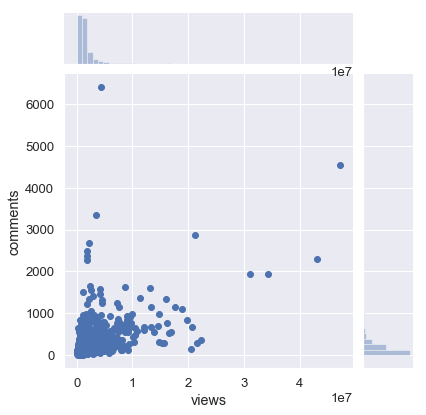

In [68]:
plt.figure(figsize = (15, 9))
sns.jointplot(x = 'views', y = 'comments', data = data[['views', 'comments']])
data[['views', 'comments']].corr('pearson')

## Analysing TED Talks by the month and the year

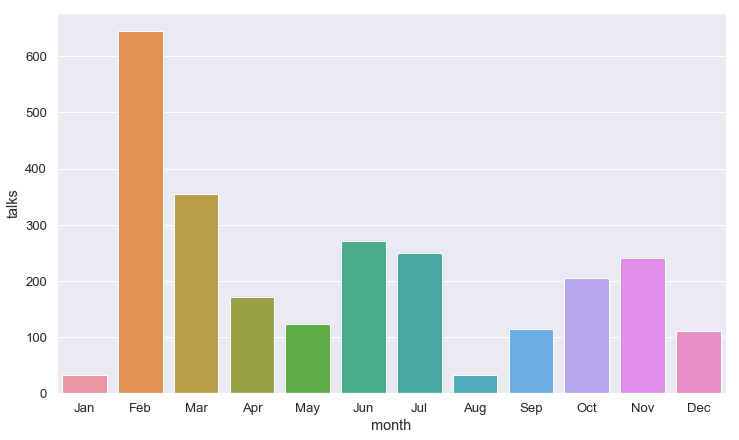

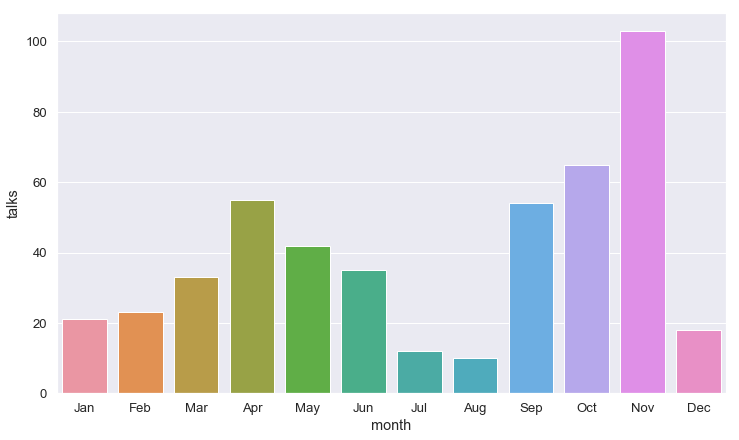

In [69]:
data['month'] = data['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])
temp = pd.DataFrame(data['month'].value_counts()).reset_index()
temp.columns = ['month', 'talks']
plt.figure(figsize=(12, 7))
sns.barplot(x = 'month', y = 'talks', data = temp, order = month_order)

temp = data[data['event'].str.contains('TEDx')]
temp = pd.DataFrame(temp['month'].value_counts().reset_index())
temp.columns = ['month', 'talks']
plt.figure(figsize=(12, 7))
sns.barplot(x = 'month', y = 'talks', data = temp, order = month_order)

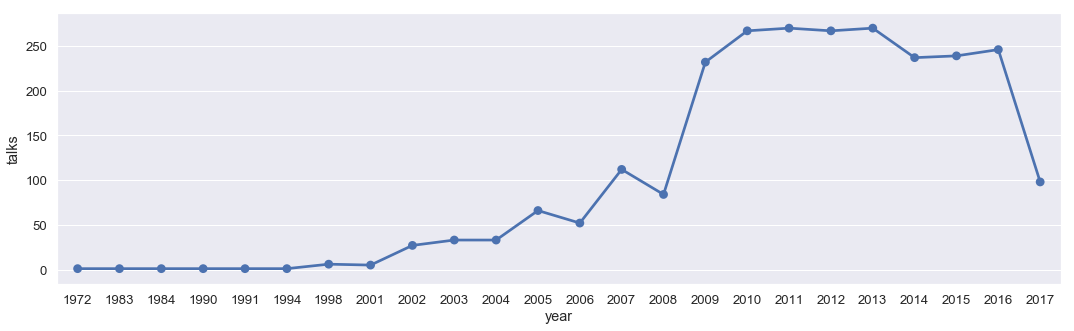

In [70]:
data['year'] = data['film_date'].apply(lambda x: x.split('-')[2])
temp = pd.DataFrame(data['year'].value_counts().reset_index())
temp.columns = ['year', 'talks']
plt.figure(figsize=(18, 5))
figure = sns.pointplot(x = 'year', y = 'talks', data = temp).get_figure()
figure.savefig('yearcount.png', dpi = 400)

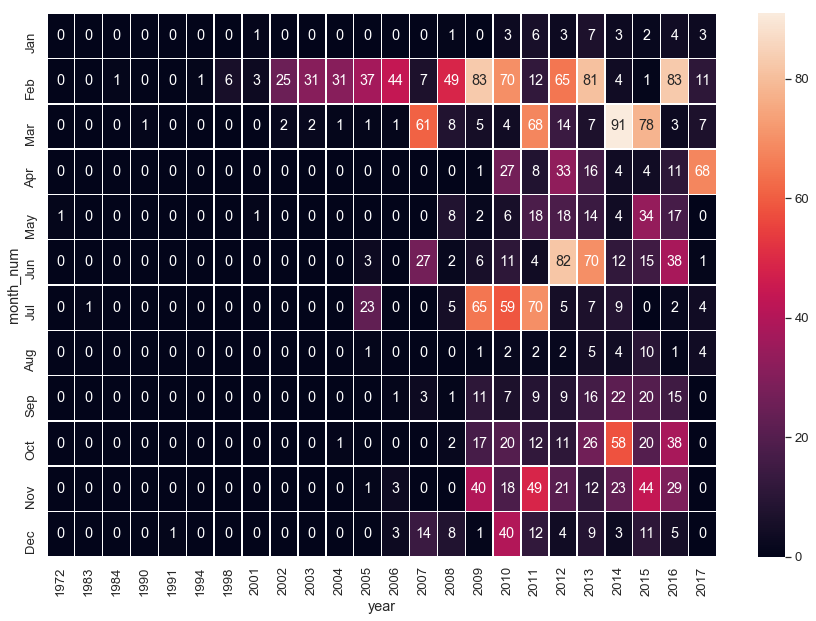

In [71]:
hmap = data.copy()
hmap['film_date'] = hmap['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1] + " " + str(x.split('-')[2]))
hmap = pd.pivot_table(hmap[['film_date', 'title']], index = 'film_date', aggfunc = 'count').reset_index()
hmap['month_num'] = hmap['film_date'].apply(lambda x: months[x.split()[0]])
hmap['year'] = hmap['film_date'].apply(lambda x: x.split()[1])
hmap = hmap.sort_values(['year', 'month_num'])
hmap = hmap[['month_num', 'year', 'title']]
hmap = hmap.pivot('month_num', 'year', 'title')
hmap = hmap.fillna(0)
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(hmap, annot = True, linewidths = .5, ax = ax, fmt = 'n', yticklabels = month_order)

## Speaker

In [72]:
speaker = data.groupby('main_speaker').count().reset_index()[['main_speaker', 'comments']]
speaker.columns = ['main_speaker', 'appearances']
speaker = speaker.sort_values('appearances', ascending = False)
speaker.head(10)

,main_speaker,appearances
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
397,Clay Shirky,5
1487,Nicholas Negroponte,5
1075,Julian Treasure,5
424,Dan Ariely,5
850,Jacqueline Novogratz,5
248,Bill Gates,5


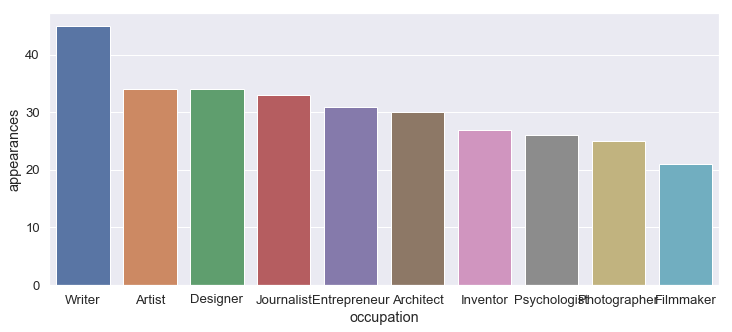

In [73]:
occupation = data.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation.columns = ['occupation', 'appearances']
occupation = occupation.sort_values('appearances', ascending = False)
plt.figure(figsize=(12, 5))
sns.barplot(x = 'occupation', y = 'appearances', data = occupation.head(10))

(0, 400.0)

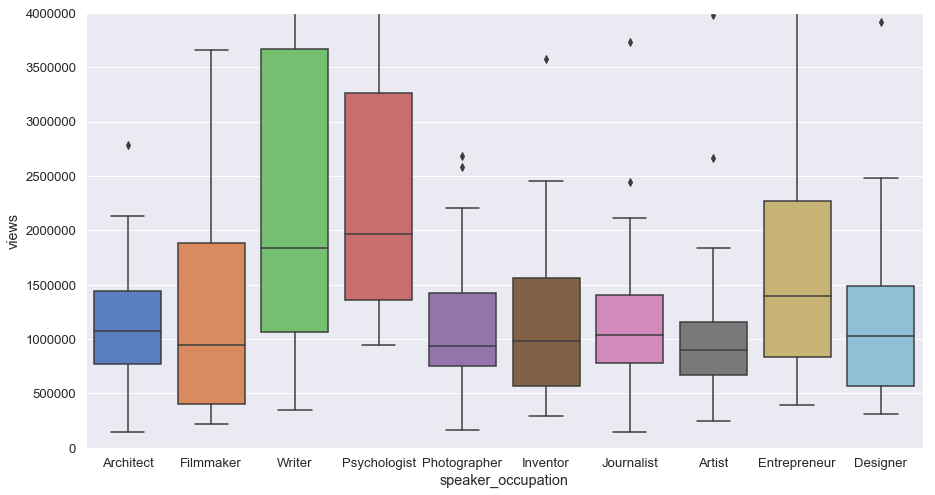

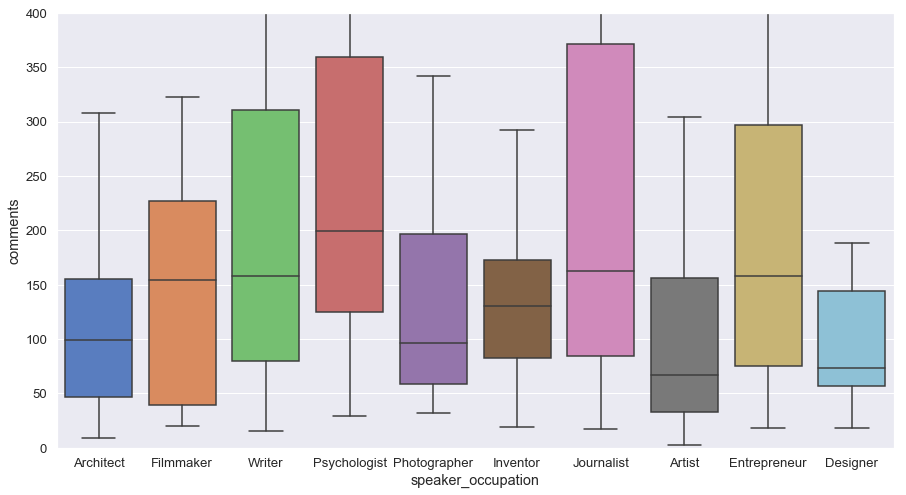

In [74]:
fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize = (15, 8))
sns.boxplot(x = 'speaker_occupation', y = 'views', data = data[data['speaker_occupation'].isin(occupation.head(10)['occupation'])], palette = "muted", ax = ax)
ax.set_ylim([0, 0.4e7])

fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize = (15, 8))
sns.boxplot(x = 'speaker_occupation', y = 'comments', data = data[data['speaker_occupation'].isin(occupation.head(10)['occupation'])], palette = "muted", ax = ax)
ax.set_ylim([0, 0.4e3])

In [75]:
events = data[['title', 'event']].groupby('event').count().reset_index()
events.columns = ['event', 'talks']
events = events.sort_values('talks', ascending = False)
events.head(10)

,event,talks
64,TED2014,84
59,TED2009,83
63,TED2013,77
66,TED2016,77
65,TED2015,75
99,TEDGlobal 2012,70
61,TED2011,70
60,TED2010,68
98,TEDGlobal 2011,68
57,TED2007,68


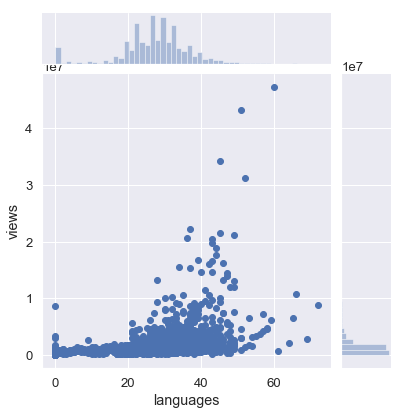

In [76]:
sns.jointplot(x = 'languages', y = 'views', data = data)

In [77]:
data['tags'] = data['tags'].apply(lambda x: ast.literal_eval(x))
s = data.apply(lambda x: pd.Series(x['tags']),axis = 1).stack().reset_index(level = 1, drop = True)
s.name = 'theme'
themes = data.drop('tags', axis = 1).join(s)
themes = themes[themes['theme'] != 'TEDx']
themes['year'] = themes['year'].astype('int')
themes = themes[themes['year'] > 2008]
themes.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,title,url,views,views/comments,month,year,theme
323,76,While we all agree that compassion is a great ...,946,TEDSalon 2009 Compassion,30-09-2009,30,Jackie Tabick,Jackie Tabick: The balancing act of compassion,1,30-10-2008,"[{'id': 25, 'name': 'OK', 'count': 14}, {'id':...","[{'id': 676, 'hero': 'https://pe.tedcdn.com/im...",Spiritual leader,The balancing act of compassion,https://www.ted.com/talks/jackie_tabick\n,176245,2319.013,Sep,2009,charter for compassion
323,76,While we all agree that compassion is a great ...,946,TEDSalon 2009 Compassion,30-09-2009,30,Jackie Tabick,Jackie Tabick: The balancing act of compassion,1,30-10-2008,"[{'id': 25, 'name': 'OK', 'count': 14}, {'id':...","[{'id': 676, 'hero': 'https://pe.tedcdn.com/im...",Spiritual leader,The balancing act of compassion,https://www.ted.com/talks/jackie_tabick\n,176245,2319.013,Sep,2009,compassion
323,76,While we all agree that compassion is a great ...,946,TEDSalon 2009 Compassion,30-09-2009,30,Jackie Tabick,Jackie Tabick: The balancing act of compassion,1,30-10-2008,"[{'id': 25, 'name': 'OK', 'count': 14}, {'id':...","[{'id': 676, 'hero': 'https://pe.tedcdn.com/im...",Spiritual leader,The balancing act of compassion,https://www.ted.com/talks/jackie_tabick\n,176245,2319.013,Sep,2009,global issues
323,76,While we all agree that compassion is a great ...,946,TEDSalon 2009 Compassion,30-09-2009,30,Jackie Tabick,Jackie Tabick: The balancing act of compassion,1,30-10-2008,"[{'id': 25, 'name': 'OK', 'count': 14}, {'id':...","[{'id': 676, 'hero': 'https://pe.tedcdn.com/im...",Spiritual leader,The balancing act of compassion,https://www.ted.com/talks/jackie_tabick\n,176245,2319.013,Sep,2009,religion
324,99,Swami Dayananda Saraswati unravels the paralle...,1014,Chautauqua Institution,30-09-2009,38,Dayananda Saraswati,Dayananda Saraswati: The profound journey of c...,1,30-10-2008,"[{'id': 10, 'name': 'Inspiring', 'count': 369}...","[{'id': 675, 'hero': 'https://pe.tedcdn.com/im...",Vedantic teacher,The profound journey of compassion,https://www.ted.com/talks/swami_dayananda_sara...,273396,2761.576,Sep,2009,charter for compassion


In [78]:
themes_count = pd.DataFrame(themes['theme'].value_counts()).reset_index()
themes_count.columns = ['theme', 'talks']
themes_count.head(10)

,theme,talks
0,technology,561
1,science,455
2,global issues,393
3,culture,339
4,design,299
5,business,263
6,innovation,221
7,society,216
8,health,213
9,social change,197


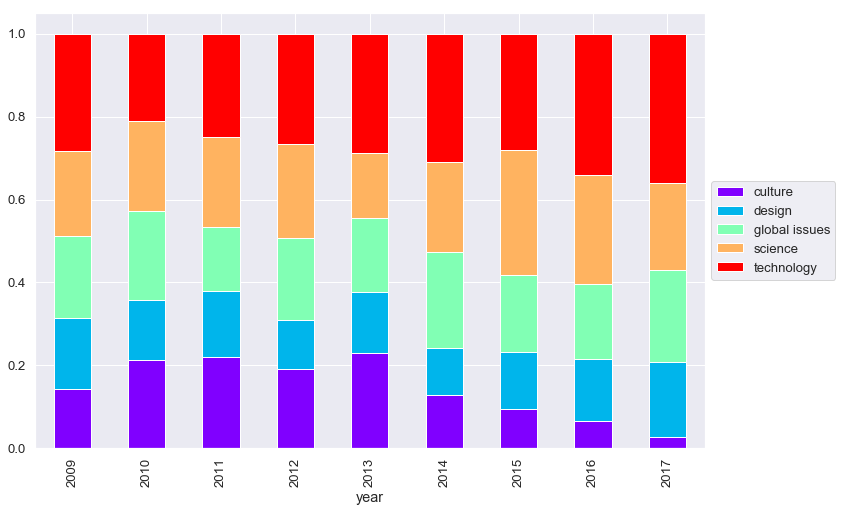

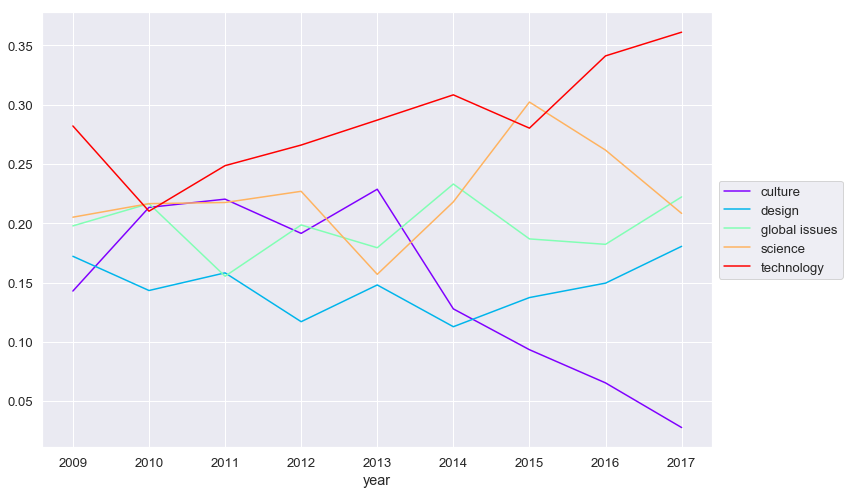

In [100]:
s = themes[themes['theme'].isin(themes_count.head(7)['theme'])]
temp = pd.crosstab(s['year'], s['theme']).apply(lambda x: x/x.sum(), axis = 1)
temp.plot.bar(stacked = True, colormap = 'rainbow', figsize = (12, 8)).legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
temp.plot.line(stacked = False, colormap = 'rainbow', figsize = (12, 8)).legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

(0, 4000000.0)

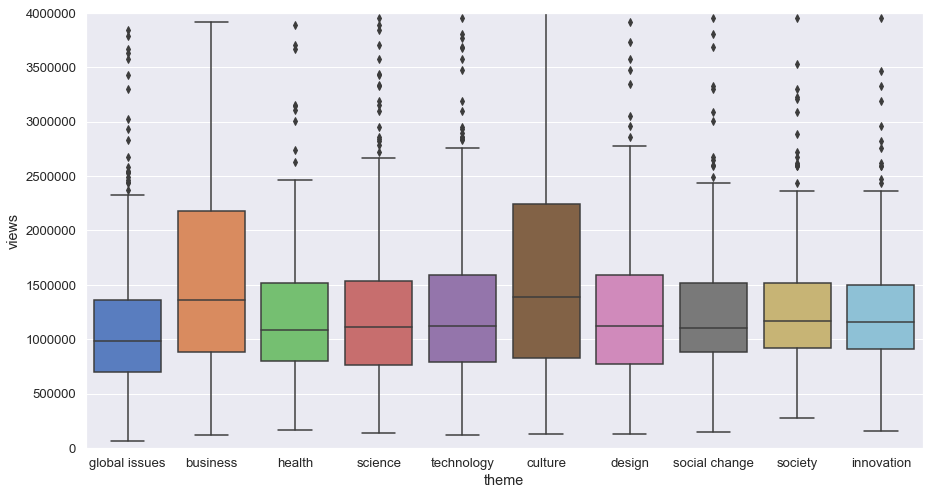

In [39]:
fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize = (15, 8))
sns.boxplot(x = 'theme', y = 'views', data = themes[themes['theme'].isin(themes_count.head(10)['theme'])], palette = "muted", ax = ax)
ax.set_ylim([0, 0.4e7])

## Talk Duration and Word Counts

,duration,views
duration,1.000,0.049
views,0.049,1.000


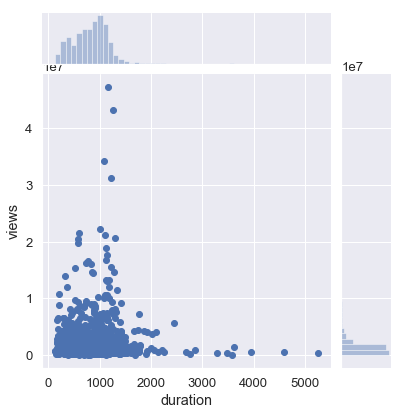

In [40]:
sns.jointplot(x = 'duration', y = 'views', data = data)
data[['duration', 'views']].corr('pearson')

In [41]:
df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\Data Mining Project\\ted-talks\\transcripts.csv")
df2 = pd.merge(left = data ,right = df, how = 'left', left_on = 'url', right_on = 'url')
df2['transcript'] = df2['transcript'].fillna('')
df2['wc'] = df2['transcript'].apply(lambda x: len(x.split()))
df2['wc'].describe()

count    2553.000
mean     1971.551
std      1009.494
min         0.000
25%      1235.000
50%      1983.000
75%      2681.000
max      9044.000
Name: wc, dtype: float64

In [42]:
df2['wpm'] = df2['wc'] / df2['duration']
df2['wpm'].describe()

count    2553.000
mean        2.369
std         0.661
min         0.000
25%         2.184
50%         2.484
75%         2.750
max         4.123
Name: wpm, dtype: float64

,wpm,views
wpm,1.000,0.066
views,0.066,1.000


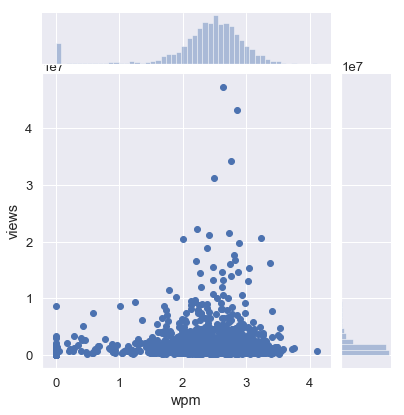

In [43]:
sns.jointplot(x = 'wpm', y = 'views', data = df2)
df2[['wpm', 'views']].corr('pearson')

## Ted Ratings

In [44]:
def rating_count(name, rlist):
    for i, dic in enumerate(rlist):
        if dic['name'] == name:
            result = dic['count']
    return result

In [45]:
data['ratings'] = data['ratings'].apply(lambda x: ast.literal_eval(x))

In [46]:
data['Funny'] = data['ratings'].apply(lambda x: rating_count('Funny', x))
data['Longwinded'] = data['ratings'].apply(lambda x: rating_count('Longwinded', x))
data['Inspiring'] = data['ratings'].apply(lambda x: rating_count('Inspiring', x))

           Inspiring  views
Inspiring      1.000  0.775
views          0.775  1.000
           Inspiring  comments
Inspiring      1.000     0.559
comments       0.559     1.000


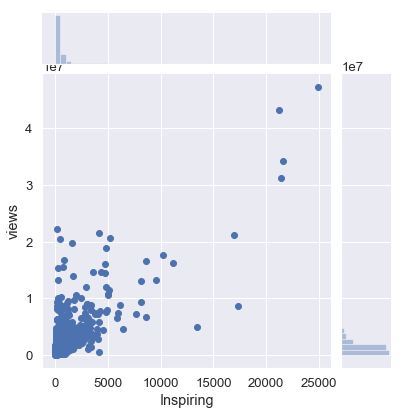

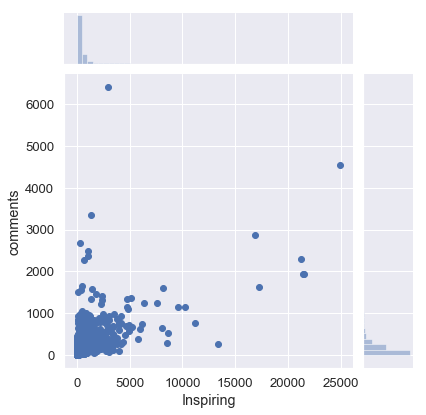

In [47]:
sns.jointplot(x = 'Inspiring', y = 'views', data = data[['views', 'Inspiring']])
print(data[['Inspiring', 'views']].corr('pearson'))

sns.jointplot(x = 'Inspiring', y = 'comments', data = data[['comments', 'Inspiring']])
print(data[['Inspiring', 'comments']].corr('pearson'))

## Related Videos

In [ ]:
data['related_talks'] = data['related_talks'].apply(lambda x: ast.literal_eval(x))

In [ ]:
s = data.apply(lambda x: pd.Series(x['related_talks']), axis = 1).stack().reset_index(level = 1, drop = True)
s.name = 'related'

In [ ]:
related = data.drop('related_talks', axis = 1).join(s)
related['related'] = related['related'].apply(lambda x: x['title'])

In [ ]:
d = dict(related['title'].drop_duplicates())
d = {v: k for k, v in d.items()}

In [ ]:
related['title'] = related['title'].apply(lambda x: d[x])
related['related'] = related['related'].apply(lambda x: d[x])

In [ ]:
related = related[['title', 'related']]

In [ ]:
edges = list(zip(related['title'], related['related']))

In [ ]:
G = nx.Graph()
G.add_edges_from(edges)
score = nx.degree_centrality(G)
score = sorted(score.items(), key=lambda item:item[1], reverse = True)
print(score[0])

score = nx.harmonic_centrality(G)
score = sorted(score.items(), key=lambda item:item[1], reverse = True)
print(score[0])

score = nx.eigenvector_centrality(G)
score = sorted(score.items(), key=lambda item:item[1], reverse = True)
print(score[0])

score = nx.betweenness_centrality(G, endpoints = True, normalized = False)
score = sorted(score.items(), key=lambda item:item[1], reverse = True)
print(score[0])

In [ ]:
plt.figure(figsize = (25, 25))
nx.draw(G, with_labels = False, color = 'y')

## The TED Word Cloud

In [ ]:
corpus = ' '.join(df['transcript'])
corpus = corpus.replace('.', '. ')

In [ ]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white',width = 2400,height = 2000).generate(corpus)
plt.figure(figsize = (12,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
now = datetime.datetime.now()
data['heat'] = data['views'] / data[['month', 'year']].apply(lambda x: (now.year - int(x['year']))*12 + int(months[x['month']]) - now.month, axis = 1)

15. Top ten talks with highest heat
The views of a talk greatly deponds on its pubilished date. Earlier videos have more time to accumulate their views. So I divided views by the time difference from published date to now as a indicator to measure the popularity of a talk. I call it “heat”. Our trainin dataset is built up to Sept, 2017.